# Week 10: Bootstrap

## March 19, 2025

**Michael Jongho Moon**

## Recap of Data Visualization

We have seen histograms and boxplots (for numeric/quantitative data).  
What do they tell us?

### Shape of a Histogram: Modality

<img src="modes.png" width="800">

### Shape of a Histogram: Skewness

<img src="symmetry.png" width="800">

### Data Descriptions: Percentiles

The $k^{th}$ percentile is a point in the data in which $k$% of the data is below that percentile.

> For example, if 170 cm is the $90^{th}$ percentile for female heights, that means that 90% of females are below 170 cm tall.

Common percentiles: 

+ the **median** is the $50^{th}$ percentile.
+ the **first quartile (Q1)** is the $25^{th}$ percentile.
+ the **third quartile (Q3)** is the $75^{th}$ percentile.

### Shape of a Boxplot

<img src="boxplot.png" width="400">

### Shape of a Boxplot: Skewness

<img src="boxplot_skew.png" width="800">

## Center of the data

If you have the following data: what is the *mean*? what is the *median*?

{4, 4, 5, 6, 7}

+ The mean is: $\frac{4 + 4 + 5 + 5 + 7}{5} = 5$
+ The median is: $5$

### Center of the data based on skewness

What if your data was right skewed? What is the *mean* and what is the *median* for the data below? 

{4, 4, 5, 5, 20}

+ The mean is: 7.6
+ The median is: 5

The <b style="color: maroon;">mean</b> gets pulled toward the outliers while the <b style="color: forestgreen;">median</b> is less sensitive to outlisers. This makes median a better representation for skewed data, or data with a lot of outliers, in general.

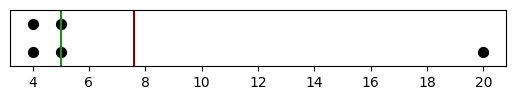

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.axvline(x=np.mean([4, 4, 5, 5, 20]), color="maroon")
plt.axvline(x=np.median([4, 4, 5, 5, 20]), color="forestgreen")
plt.ylim([0.5, 2.5])
fig = plt.scatter(x=[4, 4, 5, 5, 20], 
                  y=[1, 2, 1, 2, 1],
                  s=50,  
                  color="black", 
                  edgecolor="black")
ax = fig.axes
ax.get_yaxis().set_visible(False)
ax.set_aspect(1)

### Center of the data based on skewness

Generally, we have:

+ symmetric data has: mean $\approx$ median
+ left-skewed data has: mean < median
+ right-skewed data has: mean > median

## The Bootstrap 

Last week we covered hypothesis testing, where we tested if:

+ a percentage was different from some number (i.e., 26%)
+ if the average was different between two groups (i.e., do mammals weigh more than birds)

What if instead we wanted to just look at a statistic and provide a reasonable estimate of what we think the parameter is. 

This is where we can use bootstrapping to provide a plausible range in which we think our metric of interest will land.

For example, producing a statement such as "we are confident that the mean heights of all females is between 164 cm and 167 cm."

![](stats00.png)

A data scientist is using the data in a random sample to estimate an unknown statistical parameter.

They use the sample to calculate the value of a statistic to estimate.

![](stats01.png)

Once they calculate the observed value of the statistic, they can present it as their estimate and go on their merry way.

But they are a data scientist. They know that their random sample is just one of numerous possible random samples, and thus their estimate is just one of numerous plausible estimates.


![](stats02.png)

By how much could those estimates vary? 

To answer this, it appears as though they need to draw another sample from the population, and compute a new estimate based on the new sample, and repeat, and repeat...

But they don't have the resources to go back to the population and draw another sample.

Fortunately, a brilliant idea called the bootstrap can help. Since it is not feasible to generate new samples from the population, the bootstrap generates new random samples by a method called **resampling --- the new samples are drawn at random from the original sample.**

<img src="bootstraps.png" width="400" style="float: left; margin: 5px 25px;">

_"Achieve the impossible!" ... "Achieve the difficult but possible."_

_Source: Useless Etymology, The origins of the phrase “pull yourself up by your bootstraps”. https://uselessetymology.com/2019/11/07/the-origins-of-the-phrase-pull-yourself-up-by-your-bootstraps/_

For example, you sample 5 students and see that their heights are: {160, 162, 165, 168, 170} in cm and the median of this sample is 165.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plt_sample(samp):
    """Display resampled values.
    
    Don't worry about the code. Treat it as a black box.
    """
    fig = plt.scatter(None, None)
    max_n = 0
    for (x, n) in samp.value_counts().items():
        max_n = np.max([n, max_n])
        for y in np.arange(n):
            plt.scatter(x=x, y=y, s=50,
                        color="lightgrey",
                        edgecolor="grey")
    plt.ylim([-1, max_n])
    plt.xlim([159, 171])
    plt.xticks([160, 162, 165, 168, 170])
    plt.axvline(x=np.median(samp), color="forestgreen")
    ax = fig.axes
    ax.get_yaxis().set_visible(False)
    ax.set_aspect(1)


165.0

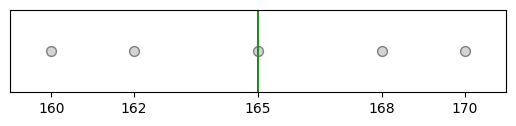

In [3]:
import pandas as pd
heights = pd.Series([160, 162, 165, 168, 170])
plt_sample(heights);
heights.median()

+ One example of a "resample" of the original sample/data is: {165, 168, 168, 168, 170} and the median of this resample is 168.

168.0

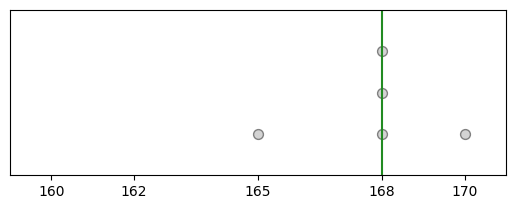

In [4]:
np.random.seed(125)
heights_1 = heights.sample(frac=1, replace=True)
plt_sample(heights_1);
heights_1.median()

+ Another resample of the original sample/data is: {160, 160, 165, 165, 168} and the mean of this resample is 165.

165.0

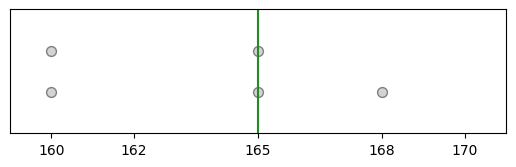

In [5]:
heights_2 = heights.sample(frac=1, replace=True)
plt_sample(heights_2);
heights_2.median()

+ Another resample of the original sample/data is: {162, 166, 168, 168, 170} and the median of this resample is 168.

168.0

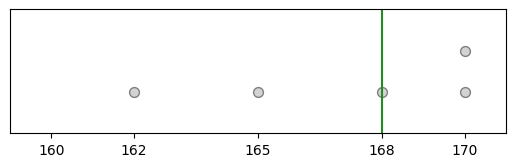

In [6]:
heights_3 = heights.sample(frac=1, replace=True)
plt_sample(heights_3);
heights_3.median()

Now, with all of our resamples we have the medians of the resamples are 168, 165, and 168.

The resample medians of 168, 165, and 168 have a mean of 167, which is pretty close to the original datas median (which was 165).

Logic of the bootstrap:

+  choose your statistic of interest (e.g., median heights of female students)
+  use `.sample(frac=1, replace=True)` to resample your data and calculate the statistic for the resample.
+  repeat the previous step a lot of times (say, at least 1000 times)
+  look at the distribution of the statistic from all of the resamples (e.g., look at the histogram of all of the resample medians).
    +  The bootstrap distribution provides an approximation of the distribution of the statistic if you were to draw many samples.
    +  E.g., find the 5th and 95th percentiles of the resampled statistics to get an interval which captures the middle 90% of the resampled statistics to approximate the range of values the statisic would fall 90% of times.

Reminder: we can use the `.sample(frac=1, replace=True)` to create the resamples.

In [7]:
pantheria = pd.read_csv("pantheria.txt", sep="\t")

print(pantheria.shape)

(5416, 55)


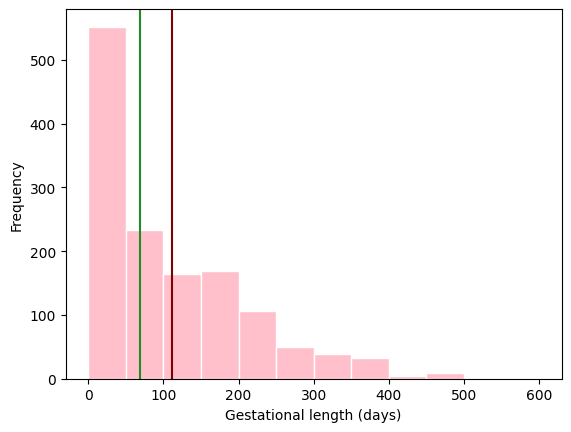

In [8]:
pantheria["9-1_GestationLen_d"].plot.hist(color="pink", edgecolor="white", bins=np.arange(0, 650, 50))
plt.axvline(x=pantheria["9-1_GestationLen_d"].median(), color="forestgreen")
plt.axvline(x=pantheria["9-1_GestationLen_d"].mean(), color="maroon")
plt.ylabel("Frequency")
plt.xlabel("Gestational length (days)");

What is a good representation of the centre of the data: <span style="color: maroon;">mean</span> or <span style="color: forestgreen;">median</span>?

In [9]:
pantheria["9-1_GestationLen_d"].median()

68.405

- Draw a random sample with replacement of the same size (number of rows) as the original sample.

- This opens the possibility for the new sample to be different from the original sample.

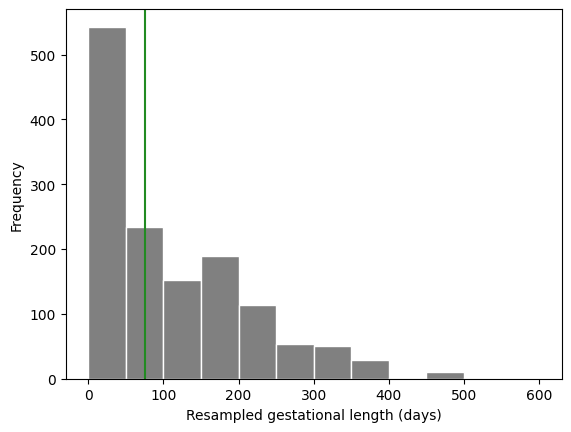

In [10]:
boot_gest = pantheria["9-1_GestationLen_d"].sample(frac=1, replace=True)

boot_gest.plot.hist(color="grey", edgecolor="white", bins=np.arange(0, 650, 50))
plt.axvline(x=boot_gest.median(), color="forestgreen")
plt.ylabel("Frequency")
plt.xlabel("Resampled gestational length (days)");

In [11]:
boot_gest.median()

75.87

65.44

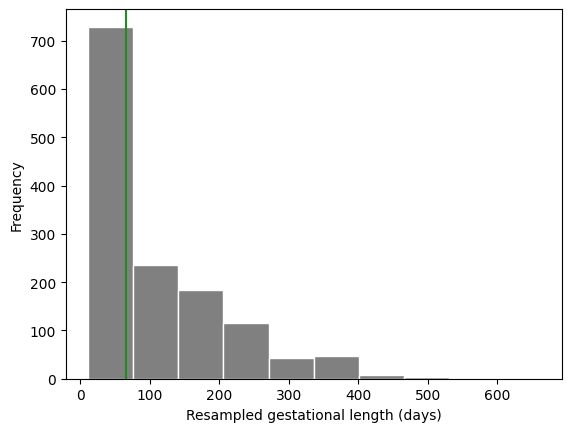

In [12]:
np.random.seed(20250319) # To keep your solution consistent

boot_gest = pantheria["9-1_GestationLen_d"].sample(frac=1, replace=True)

boot_gest.plot.hist(color="grey", edgecolor="white") 
plt.axvline(x=boot_gest.median(), color="forestgreen")
plt.ylabel("Frequency")
plt.xlabel("Resampled gestational length (days)");

boot_gest.median()

### Why is this a good idea?

- By the law of averages, the distribution of the original sample is likely to resemble the population.  

- The distributions of all the “resamples” are likely to resemble the original sample. 

- So the distributions of all the resamples are likely to resemble the population as well.

### Resampled median

- We generated one resampled or *bootstrapped* median above.

- By resampling many times we can compute the empirical distribution of the median gestation time.

In [13]:
def boot_single_median():
    """Generate a bootstrapped median of gestation period.
    """
    boot_gest_med = pantheria["9-1_GestationLen_d"].sample(frac=1, replace=True).median()
    return boot_gest_med

In [14]:
np.random.seed(125)
boot_single_median()

75.06

- Now let's compute many bootstrap medians by writing a `for` loop.

In [15]:
bootstrap_medians = []  # empty list to collect medians

np.random.seed(2025)

for _ in range(5000):
    bootstrap_medians.append(boot_single_median())

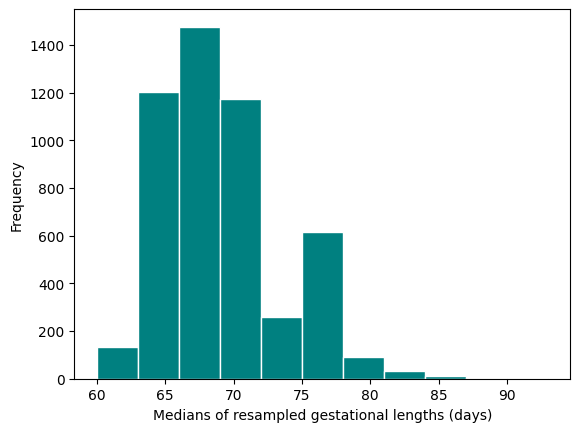

In [16]:
plt.hist(bootstrap_medians, color="teal", edgecolor="white", bins=np.arange(60, 95, 3))
plt.ylabel("Frequency")
plt.xlabel("Medians of resampled gestational lengths (days)");

## Boostrap confidence intervals

- We can use the bootstrap distribution to construct a range of values such that 95% of the random samples will contain the true median.

- The range of values is called a confidence interval.

- A 95% confidence interval for the median can be constructed finding the 2.5% percentile and the 97.5% percentile.  

- The reason for choosing 2.5% and 97.5% is that 0.05/2 = 0.025, and 1 - 0.025 = 0.975.   

- We can do this using the `percentile` function in `numpy`.

In [17]:
np.percentile(bootstrap_medians, 2.5)

62.99

In [18]:
np.percentile(bootstrap_medians, 97.5)

78.02

A 95% bootstrap confidence interval for median is 62.99 days to 78.21 days.

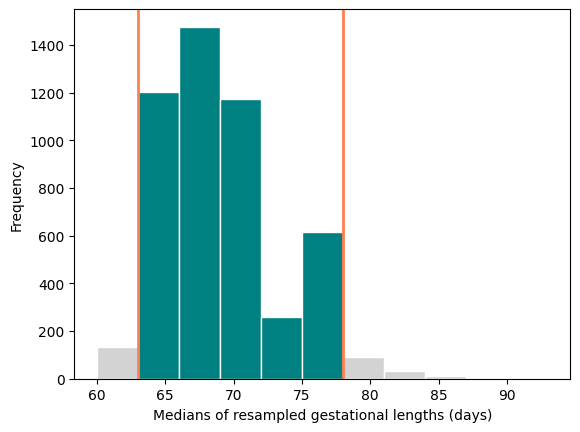

In [19]:
lwr = np.percentile(bootstrap_medians, 2.5)
upr = np.percentile(bootstrap_medians, 97.5)
plt.hist(bootstrap_medians, color="lightgrey", edgecolor="white", bins=np.arange(60, 95, 3))
plt.hist(pd.Series(bootstrap_medians)[(bootstrap_medians > lwr) & (bootstrap_medians < upr)], 
         color="teal", edgecolor="white", bins=np.arange(60, 95, 3))
plt.axvline(x=lwr, color="coral", linewidth=2)
plt.axvline(x=upr, color="coral", linewidth=2)
plt.ylabel("Frequency")
plt.xlabel("Medians of resampled gestational lengths (days)");

## Bootstrap confidence intervals for other statistics

### Do Primate carnivores have different body sizes compared to Carnivora carnivores?

- Let's create a dataset (`DataFrame`) with primates and carnivora body mass measurements. 

In [20]:
cols = ["MSW05_Order", "5-1_AdultBodyMass_g"]

condition = (pantheria["MSW05_Order"] == "Primates") | (pantheria["MSW05_Order"] == "Carnivora")

primcarn_df = pantheria.loc[condition, cols].dropna()  # .loc[rows, columns]

primcarn_df.groupby("MSW05_Order").describe()

5-1_AdultBodyMass_g                                               \
                          count          mean            std    min      25%   
MSW05_Order                                                                    
Carnivora                 250.0  47386.453560  153411.127148  78.45  1401.37   
Primates                  265.0   5880.936113   13134.573529  31.23   749.47   

                                              
                  50%        75%         max  
MSW05_Order                                   
Carnivora    3592.265  12948.115  1600000.00  
Primates     3005.990   7077.660   149325.19

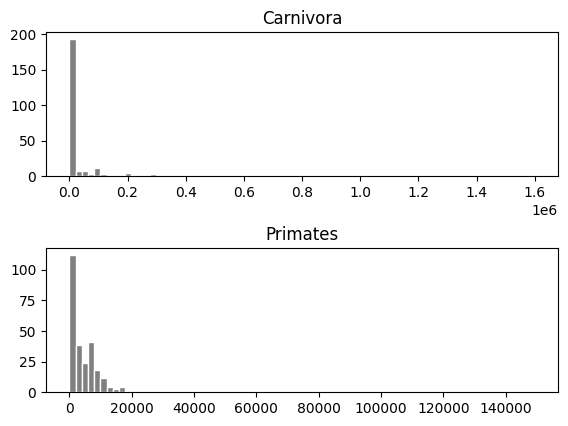

In [21]:
primcarn_df.hist(by="MSW05_Order", bins=75, edgecolor="white", color="grey",
                #  orientation="horizontal",
                layout=[2, 1], # [rows, columns]
                # sharex=True, # share same axis
                xrot=0);

Create a function to create one bootstrap sample of the median difference.

In [22]:
def boot_single_median_diff():
    """Generate a bootstrapped difference in adult body mass medians.
    
    The function computes the difference of the medians by subtracting the bootstrapped median
    of primates from the bootstrapped median of carnivoras.
    """
    # sample body mass with replacement
    boot_mass = primcarn_df.sample(frac=1, replace=True)
    # primate rows
    primes = boot_mass["MSW05_Order"] == "Primates"
    # carnivora rows
    carns = boot_mass["MSW05_Order"] == "Carnivora"
    
    # compute difference in medians on bootstrap sample
    boot_mass_med_diff = (
        boot_mass.loc[carns, "5-1_AdultBodyMass_g"].median() 
        - boot_mass.loc[primes, "5-1_AdultBodyMass_g"].median())    # carnivores - primates
    return boot_mass_med_diff

In [23]:
boot_single_median_diff()

1646.9099999999999

Now, compute bootstrap distribution for a `for` loop.

In [24]:
bootst_med_diffs = []

for _ in range(5000):
    bootst_med_diffs.append(boot_single_median_diff())

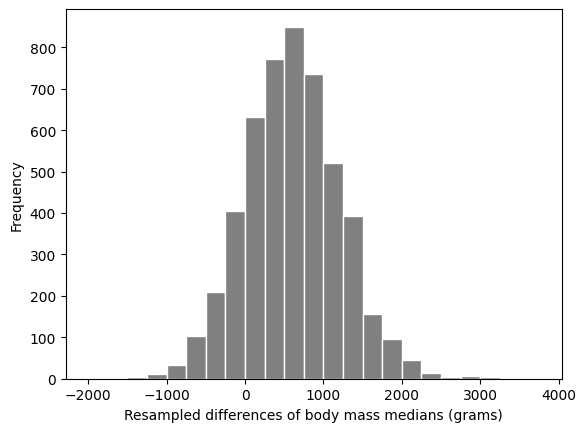

In [25]:
plt.hist(bootst_med_diffs, color="grey", edgecolor="white", bins=np.arange(-2000, 4000, 250))
plt.ylabel("Frequency")
plt.xlabel("Resampled differences of body mass medians (grams)");

A 95% confidence interval for the median difference in mass of carnivores and primates is:

In [26]:
np.percentile(bootst_med_diffs, 2.5), np.percentile(bootst_med_diffs, 97.5) 

(-569.2983750000001, 1819.3169999999996)

The confidence interval contains 0. So we cannot really rule out that the medians are the same.

Therefore there is very weak evidence that the medians are different. 

## Overview

Hypothesis testing covered how to:
+ test if a percentage (statistic) is different from some hypothesized values.
+ test if two different groups have different means (or median).

Confidence intervals covered how to:
+ get a range of values which estimate a parameter (i.e., mean, median, percentage).
+ get a range of values which estimate the difference in means (or medians) of two different groups.

With linear regression we will cover how to:
+ look at the relationship between two columns in a data frame. (E.g., the relationship between height and mass of mammals).

## Linear Regression

### Basic idea

- Linear regression is a useful technique for creating models to explain relationships between variables. 

- The dependent variable must be numeric, and have meaningful numeric values. 

- The independent variables can be quantitative or categorical variables.

Essentially we have some data and want to estimate the line. 

<img src="line.png" width="400" style="float:left; margin: 5px 25px;">

We call the estimated line $\hat{Y} = b_0 + b_1 X$, where:
+ $b_0$ is the estimated y-intercept
+ $b_1$ is the estimated slope

### Example 1: A perfect linear relationship 

In [27]:
import pandas as pd
import numpy as np

data = {"indvar" : np.arange(start=0, stop=9, step=1),
       "depvar" : np.arange(start=7, stop=16, step=1)}

df = pd.DataFrame(data)

df

,indvar,depvar
0,0,7
1,1,8
2,2,9
3,3,10
4,4,11
5,5,12
6,6,13
7,7,14
8,8,15


Let's plot the data

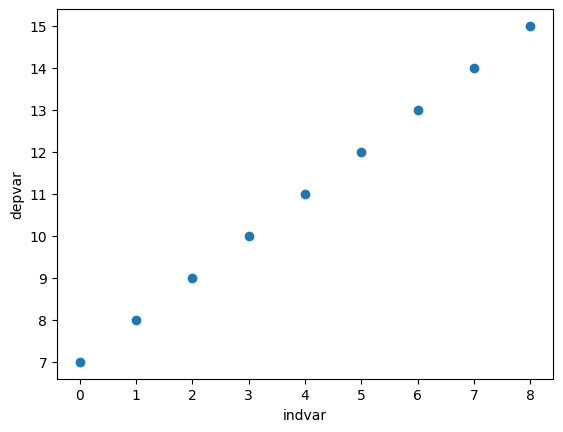

In [28]:
import matplotlib.pyplot as plt

plt.scatter(x=df["indvar"], y=df["depvar"])
plt.xlabel("indvar")
plt.ylabel("depvar");

- The scatter plot shows each pair of points (0, 7), (1, 8), etc. 
- `"indvar"` is sometimes called an _independent_ or _predictor_ variable, or _covariate_,  
and `"depvar"` is called the _dependent_ variable or _response_ variable.
- In this example the dependent variable is perfectly predicted by the independent variable using the line y=7+1x. 

### Compute the regression line

In [29]:
import statsmodels.formula.api as smf

regmod = smf.ols("depvar ~ indvar", data=df) # setup the model

- The code above uses the `ols()` function from `statsmodels.formula.api` 

- The syntax in the function `ols()` function `"depvar ~ indvar"` is a special syntax for describing statistical models.  

- The column name to the **left** of `~` specifies the dependent variable.

- The column name to the **right** of `~` specifies the independent variable(s).

In [30]:
regmod_fit = regmod.fit() # estimate/fit the model 

After the model is setup then the `fit` function can be applied to the model.  This function computes the equation of the regression line.

In [31]:
regmod_fit.params # get parameter estimates

Intercept    7.0
indvar       1.0
dtype: float64

- The estimates of the **y-intercept** and **slope** are labelled `Intercept` (7.0)  and `indvar` (1.0).

- This means the regression equation is: $$\texttt{depvar} = 7 + 1 \times \texttt{indvar}$$ or $$Y = 7 + 1 \times X$$

### Example 2: Another perfect linear relationship

In [32]:
data = {"depvar" : np.arange(start=0, stop=8, step=1) + 2,
       "indvar" : np.arange(start=0, stop=8, step=1)}

df = pd.DataFrame(data)

df

,depvar,indvar
0,2,0
1,3,1
2,4,2
3,5,3
4,6,4
5,7,5
6,8,6
7,9,7


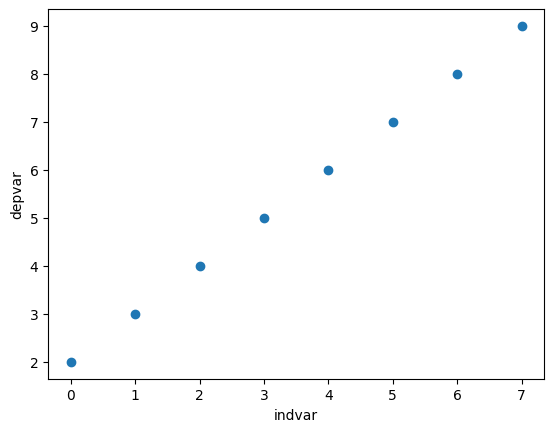

In [33]:
plt.scatter(x=df["indvar"], y=df["depvar"])
plt.xlabel("indvar")
plt.ylabel("depvar");

In [34]:
regmod = smf.ols("depvar ~ indvar", data=df) # setup the model

regmod_fit = regmod.fit() # estimate/fit the model 

regmod_fit.params # get parameter estimates

Intercept    2.0
indvar       1.0
dtype: float64

- The scatter plot is similar to Example 1 except that the values of the dependent variable has been increased by 2.

- The equation of the regression line for this data is:  $$\texttt{depvar} = 2 + 1 \times \texttt{indvar} $$

For the line: $$\texttt{depvar} = 2 + 1 \times \texttt{indvar} $$

### Interpretation of y-intercept

- When the independent variable is 0 the dependent variable is 2.  This is the meaning of the **y-intercept** value of 2.

### Interpretation of slope

- For a one-unit change in the independent variable we expect the dependent variable increases by 1 unit.

### Example 3: Close to linear

- Examples 1 and 2 were perfect linear relationships.

- In this example we examine what happens if the relationship between the dependent and independent variables is almost perfectly linear.

In [35]:
np.random.seed(2025) # set the seed so that it's reproducible

data = {"depvar" : np.arange(start=0, stop=8, step=1) + 2,
        "indvar" : np.arange(start=0, stop=8, step=1) + np.random.uniform(low=0, high=2, size=8)}

df = pd.DataFrame(data)

df

,depvar,indvar
0,2,0.270976
1,3,2.775703
2,4,3.865211
3,5,3.891136
4,6,4.776471
5,7,5.515193
6,8,7.314735
7,9,7.985234


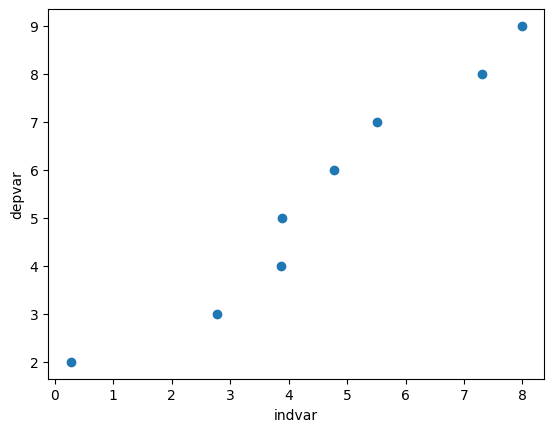

In [36]:
plt.scatter(x=df["indvar"], y=df["depvar"])
plt.xlabel("indvar")
plt.ylabel("depvar");

In [37]:
regmod = smf.ols("depvar ~ indvar", data=df) # setup the model

regmod_fit = regmod.fit() # estimate/fit the model 

regmod_fit.params # get parameter estimates

Intercept    1.112654
indvar       0.964393
dtype: float64

So, now the relationship isn't perfectly linear, but close.  The equation of this regression line is:

$$\texttt{depvar} = 1.112654 + 0.964393 \times \texttt{indvar}$$

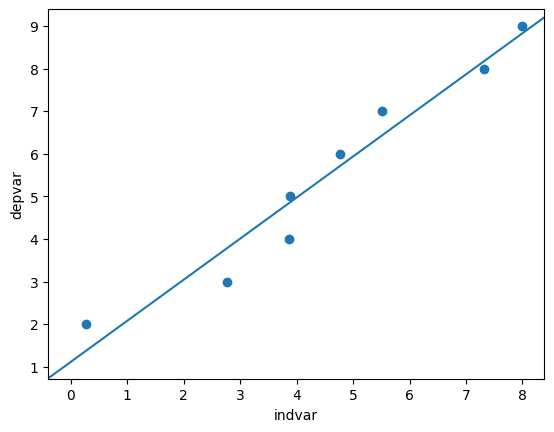

In [38]:
plt.scatter(x=df["indvar"], y=df["depvar"])
plt.axline(xy1=(0, 1.112654), slope=0.964393)
plt.xlabel("indvar")
plt.ylabel("depvar");

+  `plt.axline()` from the `matplotlib.pyplot` can be used to add a line to a plot.
+  We can use `xy1` and `slope` to specify the intercept point and the slope of the line respectively.

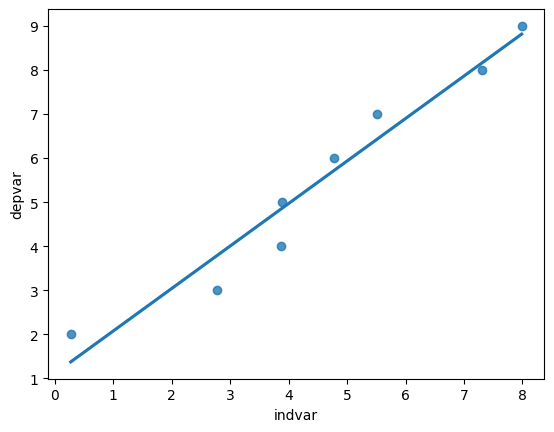

In [39]:
import seaborn as sns
sns.regplot(x="indvar", y="depvar", data=df, ci=None);

The `regplot()` function in the `seaborn` library will produce a scatter plot with the regression line.

The parameters of `regplot()`

- `x` is the independent variable.
- `y` is the dependent variable.
- `ci=None` specifies no confidence interval for the regression line.

### Statistical summary of linear regression

In [40]:
import warnings
warnings.filterwarnings("ignore") # turn off warnings

regsum = regmod_fit.summary()
# warnings.filterwarnings("default") # turn warnings back on
regsum.tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1127,0.473,2.353,0.057,-0.044,2.270
indvar,0.9644,0.093,10.408,0.000,0.738,1.191


- A statistical summary of the regression model is given above using the `summary` function in `statsmodels`.

- There are three summary tables, but we will only be interested in the second summary table --- `regsum.tables[1]` (in this course).

In [41]:
regsum.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1127,0.473,2.353,0.057,-0.044,2.270
indvar,0.9644,0.093,10.408,0.000,0.738,1.191


What does the statistical summary represent?

- the column labelled `coef` are same values as `regmod_fit.params`.  In this case the average increase `depvar` for a one unit change in `indvar` is 0.9319.

- the `std err` column represents the standard deviation of the intercept and slope (we won't discuss in this course).

- the `t` column represents the value of the t-statistic (we won't discuss in this course).

- the column `P>|t|` represents the p-value corresponding to the null hypothesis that the intercept or slope are equal to 0.  If the value is small then this is evidence against the null hypothesis.  But if the p-value is large then there is no evidence against the null hypothesis.  

In [42]:
regsum.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1127,0.473,2.353,0.057,-0.044,2.270
indvar,0.9644,0.093,10.408,0.000,0.738,1.191


- The traditional threshold is 0.05 (i.e., a p-value less than or equal to 0.05 is supposed to indicate evidence against the null hypothesis). However, we shouldn't conclude solely based on the p-value being smaller than an arbitrary threshold.

- In the example above the p-value for the slope is 0 (or too close to 0 to display).  This indicates strong evidence that the *true* value of the slope is non-zero.

- The columns `[0.025   0.975]` form a plausible range of values for the y-intercept and slope (formally known as a 95% confidence interval). In this case the plausible values for the slope are 0.738 and 1.191.  

- If the plausible range includes 0 then this is usually interpreted as not providing evidence against the null hypothesis (equivalent to saying a p-value greater than 0.05 does not provide the evidence).

### Fitted values, predicted values, and residuals

If the values of the independent variable are plugged into the regression equation then we obtain the fitted values.

$$\texttt{depvar} = 1.1127 + 0.9644 \times \texttt{indvar}$$

In [43]:
df

,depvar,indvar
0,2,0.270976
1,3,2.775703
2,4,3.865211
3,5,3.891136
4,6,4.776471
5,7,5.515193
6,8,7.314735
7,9,7.985234


The **fitted value** for the first row of `df` is:

In [44]:
1.1127 + 0.9644 * df.loc[0, "indvar"]

1.3740295701020528

- If the linear regression model is used on an independent variable that is not in the data set used to build the model then it's often referred to as a **predicted value**.

To extract the fitted values from a regression model access the `fittedvalues` attribute of the fitted `statsmodels` object.

In [45]:
regmod_fit.fittedvalues

0    1.373982
1    3.789524
2    4.840238
3    4.865240
4    5.719051
5    6.431469
6    8.166936
7    8.813560
dtype: float64

The **residual** is how far above or below the line a point is. So, it is the dependent variable minus the fitted value.  

So, for the first row the residual is:

In [46]:
2 - 1.373982

0.626018

We will chat more about residuals next week.

## Accuracy of linear regression

- There are several measures of accuracy for linear regression.

- Popular measures are R-squared and root mean squared error; we will discuss root mean squared error next class.

- R-squared can be calculated from a fitted model regression model using the `rsquared` attribute in a fitted `statsmodels` object.

- R-squared is always between 0 and 1.  
     + R-squared of 0 indicates a poor fit
     + R-squared of 1 indicates a perfect fit

In [47]:
regmod_fit.rsquared

0.9475191933375974

### Example 4: Regression with two or more independent variables

It's possible to include more than one independent variable in a regression model.  

In [48]:
np.random.seed(11) #set the seed so that it's reproducible

data = {"depvar" : np.arange(start=0, stop=8, step=1) + 2,
        "indvar1" : np.arange(start=0, stop=8, step=1) + np.random.uniform(low=0, high=2, size=8),
        "indvar2" : np.arange(start=0, stop=8, step=1) + np.random.normal(loc=0, scale=1, size=8)}

df = pd.DataFrame(data)

df

,depvar,indvar1,indvar2
0,2,0.360539,-0.536629
1,3,1.038950,1.315403
2,4,2.926437,2.421051
3,5,4.449868,1.934397
4,6,4.840407,3.113760
5,7,5.970854,4.524267
6,8,6.025562,6.689682
7,9,7.974743,7.561192


To include more than one independent variable in a regression model add it to the right side of syntax for describing statistical models.

`"depvar ~ indvar1 + indvar2"`

In [49]:
regmod = smf.ols("depvar ~ indvar1 + indvar2", data=df) # setup the model

Now `fit` `regmod`.

In [50]:
regmod_fit = regmod.fit() # estimate/fit the model 

Extract the regression parameter estimates using `params`.

In [51]:
regmod_fit.params # get parameter estimates

Intercept    1.892482
indvar1      0.549341
indvar2      0.385197
dtype: float64

The estimated linear (multiple) linear regression model is:

$$\texttt{depvar} = 1.892482 + 0.549341 \times \texttt{indvar1} + 0.385197 \times \texttt{indvar2}$$

- The y-intercept value (1.892482) is the value of the dependent variable when `indvar1` and `indvar2` are both 0.

-  If `indvar1` changes by one-unit, `depvar` changes (on average) by 0.549341.

-  If `indvar2` changes by one-unit, `depvar` changes (on average) by 0.385197. 

### Statistical summary of a multiple regression model

In [52]:
multregsummary = regmod_fit.summary()

multregsummary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.8925,0.201,9.432,0.000,1.377,2.408
indvar1,0.5493,0.102,5.411,0.003,0.288,0.810
indvar2,0.3852,0.097,3.984,0.010,0.137,0.634


The statistical summary indicates:

- the p-value for `indvar1` is 0.003 and the range of plausible values for the slope is 0.288 to 0.810.

- the p-value for `indvar2` is 0.010 and the range of plausible values for the slope is 0.137 to 0.634.  

- Since, both p-values are small there is evidence that slope is different from 0, and the range of plausible values does not include 0.

### Accuracy of multiple regression model

In [53]:
regmod_fit.rsquared

0.9914100322269062

## A regression model of longevity on gestation

### Data

- pantheria data contains data on longevity and body mass.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

pantheria = pd.read_csv("pantheria.txt", sep="\t")
pantheria.head()

,MSW05_Order,MSW05_Family,MSW05_Genus,MSW05_Species,MSW05_Binomial,1-1_ActivityCycle,5-1_AdultBodyMass_g,8-1_AdultForearmLen_mm,13-1_AdultHeadBodyLen_mm,2-1_AgeatEyeOpening_d,...,26-6_GR_MinLong_dd,26-7_GR_MidRangeLong_dd,27-1_HuPopDen_Min_n/km2,27-2_HuPopDen_Mean_n/km2,27-3_HuPopDen_5p_n/km2,27-4_HuPopDen_Change,28-1_Precip_Mean_mm,28-2_Temp_Mean_01degC,30-1_AET_Mean_mm,30-2_PET_Mean_mm
0,Artiodactyla,Camelidae,Camelus,dromedarius,Camelus dromedarius,3.0,492714.47,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Carnivora,Canidae,Canis,adustus,Canis adustus,1.0,10392.49,NaN,745.32,NaN,...,-17.53,13.00,0.0,35.20,1.0,0.14,90.75,236.51,922.90,1534.40
2,Carnivora,Canidae,Canis,aureus,Canis aureus,2.0,9658.70,NaN,827.53,7.50,...,-17.05,45.74,0.0,79.29,0.0,0.10,44.61,217.23,438.02,1358.98
3,Carnivora,Canidae,Canis,latrans,Canis latrans,2.0,11989.10,NaN,872.39,11.94,...,-168.12,-117.60,0.0,27.27,0.0,0.06,53.03,58.18,503.02,728.37
4,Carnivora,Canidae,Canis,lupus,Canis lupus,2.0,31756.51,NaN,1055.00,14.01,...,-171.84,3.90,0.0,37.87,0.0,0.04,34.79,4.82,313.33,561.11


We will be interested in the following columns.

In [55]:
cols = ["5-1_AdultBodyMass_g", "17-1_MaxLongevity_m", "9-1_GestationLen_d", "MSW05_Binomial"]

panthdat_trans = pantheria[cols]

colnames = {cols[0] : "bodymass",
            cols[1] : "longevity",
            cols[2] : "gestation",
            cols[3] : "name"}

panthdat_trans = panthdat_trans.copy()

panthdat_trans.rename(columns=colnames, inplace=True)

panthdat_trans.head()

,bodymass,longevity,gestation,name
0,492714.47,480.0,386.51,Camelus dromedarius
1,10392.49,137.0,65.00,Canis adustus
2,9658.70,192.0,61.24,Canis aureus
3,11989.10,262.0,61.74,Canis latrans
4,31756.51,354.0,63.50,Canis lupus


Let's look at the distribution of `"bodymass"` `"longevity"`, and `"gestation"`.

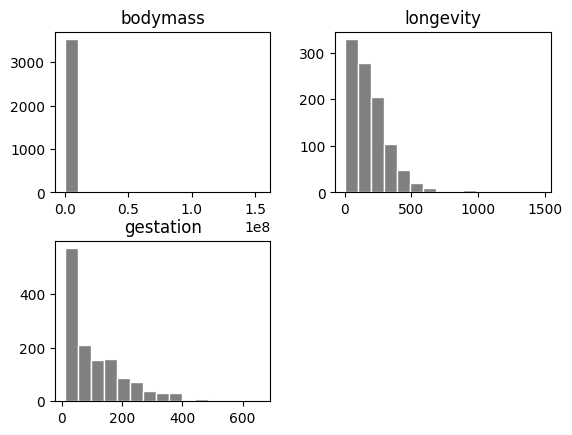

In [56]:
panthdat_trans.hist(column=["bodymass", "longevity", "gestation"],
                    bins=15, color="grey", edgecolor="white", grid=False);

Let's specifically now look at longevity and gestation:

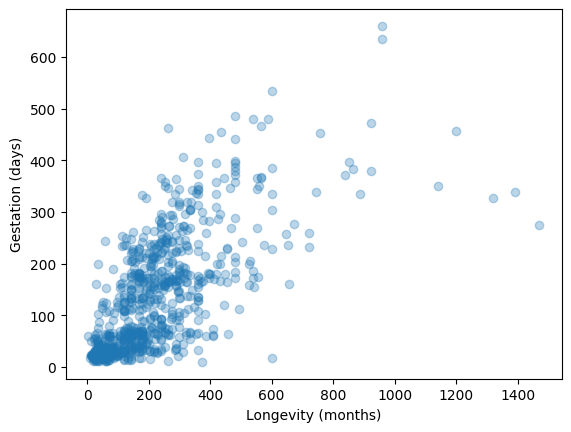

In [57]:
plt.scatter(y=panthdat_trans["gestation"], x=panthdat_trans["longevity"],
            alpha=.3) # helps display overlapping data values 
plt.xlabel("Longevity (months)")
plt.ylabel("Gestation (days)");

## A regression model of length of longevity on gestation

### Fit the regression model

In [58]:
import statsmodels.formula.api as smf

reg_longgest = smf.ols("gestation ~ longevity", data=panthdat_trans) # setup the model

reg_longgest_fit = reg_longgest.fit() # estimate/fit the model 

## Statistical summary of the regression model

In [59]:
reg_longgest_summ = reg_longgest_fit.summary()

reg_longgest_summ.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,38.6062,4.316,8.945,0.000,30.135,47.078
longevity,0.4310,0.016,27.657,0.000,0.400,0.462


- The regression equation is: $\texttt{gestation} = 38.6062 + 0.431\times \texttt{longevity}$
- The **slope** indicates that for a 1 month **increase** in longevity, we expectat the gestational period to increase by 0.43 days.
- The **y-intercept** indicates that when longevity is 0 months, gestational period is 38.6 days.

Are there any species with 0 longevitiy?

- No! 

The **y-intercept** in regression models often doesn"t have a sensible interpretation, but is often mathematically important for regression to work well.

### Accuracy of regression model

In [60]:
reg_longgest_fit.rsquared

0.4844536720243986

This $R^2$ is pretty far from 1, and so using a line to predict the relationship between longevity and gestational length probably isn't the best approach.

We can probably do better, but we will save "model improvements" for next week.

## Conclusion of data analysis using linear regression model

The regression model appears to provide an okay to moderate fit the data. The scatter plot indicated that there is a lot of variation in gestational length based on the different longevities.

- As the longevity increases, we expect gestational length to increase too. 

- Next week we will build on this and look at other factors that might affect gestation.